In [30]:
# --- import packages
import sys
sys.path.append("..")   # go up one directory so Python sees Librarian/

from Librarian.models import WorldDataset, CobbDouglasFit
from Librarian.config import REGION_PALETTE, REGION_NAME_MAP, INDICATORS
import matplotlib.pyplot as plt
import seaborn as sns


Retriving data from 20+ years allow us to do single-cuontry analisys or comparison between few countries in the second part of the project. For this part we need only one year to compare all the nations, so we select it with the snapshot method.
Put it in a different block to save time during iterations.

In [31]:
# --- Load dataset
world = WorldDataset.from_api(INDICATORS, years=range(2000, 2023))



In [32]:
# --- Select 2022 snapshot
snapshot = world.snapshot(2022,
    dropna_cols=["energy_use_per_capita", "co2_per_capita", "electric_power_consumption"]
)

# --- Add region names
snapshot = world.add_region_names(snapshot)
snapshot["region_name"] = snapshot["region"].map(REGION_NAME_MAP).fillna("Other")



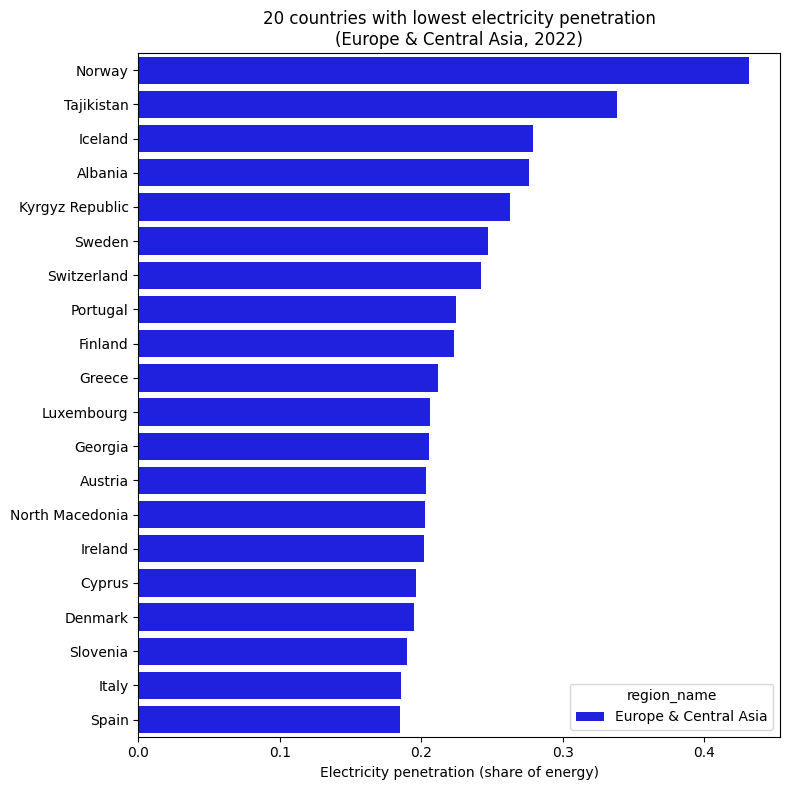

In [46]:
# compute the index first
snapshot["electricity_penetration"] = (
    snapshot["electric_power_consumption"] / snapshot["energy_use_per_capita"]
)

# keep only Europe & Central Asia
best = snapshot[snapshot["region_name"] == "Europe & Central Asia"].copy()

best = best.nlargest(20, "electricity_penetration")
# (optional) take 20 lowest values

plt.figure(figsize=(8, 8))
sns.barplot(
    data=best,
    x="electricity_penetration",
    y="name",
    hue="region_name",
    dodge=False,
    palette=REGION_PALETTE,
)
plt.xlabel("Electricity penetration (share of energy)")
plt.ylabel("")   # country names are on y axis
plt.title("20 countries with lowest electricity penetration\n(Europe & Central Asia, 2022)")
plt.tight_layout()
plt.show()

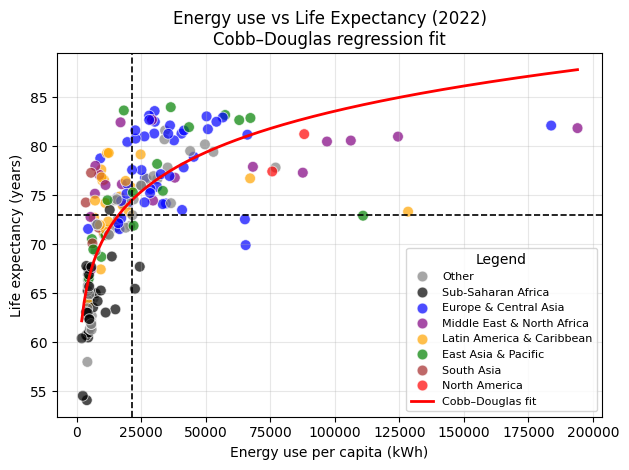

R² (log-log): 0.574
Fitted model: LifeExpectancy = 35.45 * EnergyUse^0.075


In [4]:
# --- Fit model
x = snapshot["energy_use_per_capita"]
y = snapshot["life_expectancy"]
fit = CobbDouglasFit.fit(x, y)
x_fit, y_fit = fit.curve(x.min(), x.max())



# --- Plot
sns.scatterplot(
    data=snapshot, 
    x="energy_use_per_capita", 
    y="life_expectancy",
    hue="region_name", 
    palette=REGION_PALETTE,
    s=60, #bubble dimentions
    alpha=0.7, #bubble trasparency
)

plt.plot(x_fit, y_fit, color="red", linewidth=2, label="Cobb–Douglas fit")
plt.grid(alpha=0.3)
plt.axvline(21500, color="black", linestyle="--", linewidth=1.2)
plt.axhline(73, color="black", linestyle="--", linewidth=1.2)
plt.xlabel("Energy use per capita (kWh)")
plt.ylabel("Life expectancy (years)")
plt.title("Energy use vs Life Expectancy (2022)\nCobb–Douglas regression fit")
plt.legend(title="Legend", loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

print(f"R² (log-log): {fit.r2:.3f}")
print(f"Fitted model: LifeExpectancy = {fit.A:.2f} * EnergyUse^{fit.alpha:.3f}")


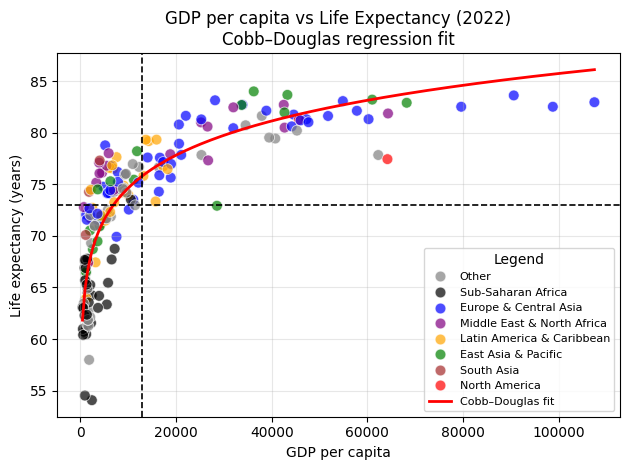

R² (log-log): 0.720
Fitted model: LifeExpectancy = 42.88 * EnergyUse^0.060


In [5]:
# --- Fit model
x = snapshot["gdp_per_capita_const"]
y = snapshot["life_expectancy"]
fit = CobbDouglasFit.fit(x, y)
x_fit, y_fit = fit.curve(x.min(), x.max())

# --- Plot
sns.scatterplot(
    data=snapshot, 
    x="gdp_per_capita_const", 
    y="life_expectancy",
    hue="region_name", 
    palette=REGION_PALETTE,
    s=60,
    alpha=0.7,
)
plt.plot(x_fit, y_fit, color="red", linewidth=2, label="Cobb–Douglas fit")
plt.grid(alpha=0.3)
plt.axvline(12800, color="black", linestyle="--", linewidth=1.2)
plt.axhline(73, color="black", linestyle="--", linewidth=1.2)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy (years)")
plt.title("GDP per capita vs Life Expectancy (2022)\nCobb–Douglas regression fit")
plt.legend(title="Legend", loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

print(f"R² (log-log): {fit.r2:.3f}")
print(f"Fitted model: LifeExpectancy = {fit.A:.2f} * EnergyUse^{fit.alpha:.3f}")
